<a href="https://colab.research.google.com/github/RWLab/crypto-pod/blob/main/research/trend-momentum-spot-analysis/update_2023/using_binance_and_coincodex_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# snippet: rw load rwRtools v0.8
source("https://raw.githubusercontent.com/RWLab/rwRtools/master/examples/colab/load_libraries.R")
debug_msg <- load_libraries(load_rsims = FALSE, extra_libraries = c(), extra_dependencies = c())

# auth
rwRtools::rwlab_data_auth()

Using 2  CPUs for package installation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpzXACAB/remotes8714c09a7e/RWLab-rwRtools-f742350/DESCRIPTION’ ... OK
* preparing ‘rwRtools’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘rwRtools_0.1.53.tar.gz’

Authorization successful!

## Price and Market Cap from Coincodex

In [ ]:
coincodex <- rwRtools::crypto_get_coincodex()
head(coincodex)

ℹ Downloading coincodex_marketcap.feather

✔ Saved coincodex_marketcap.feather to coincodex/coincodex_marketcap.feather  (…





File successfully transferred


Ticker,Date,Price,Volume,MarketCapUSD
<chr>,<date>,<dbl>,<dbl>,<dbl>
BTCD,2017-01-01,3.500750e+00,2.141424e+03,4.513253e+06
TGC,2017-01-01,3.355230e-04,1.809028e+01,1.461090e+04
ATOM,2017-01-02,1.210969e-02,5.763597e+03,9.059482e+04
BTC,2017-01-02,1.016241e+03,1.871437e+08,1.634320e+10
BTCD,2017-01-02,3.389330e+00,2.864861e+03,4.516087e+06
DASH,2017-01-02,1.156342e+01,3.853539e+06,8.113380e+07


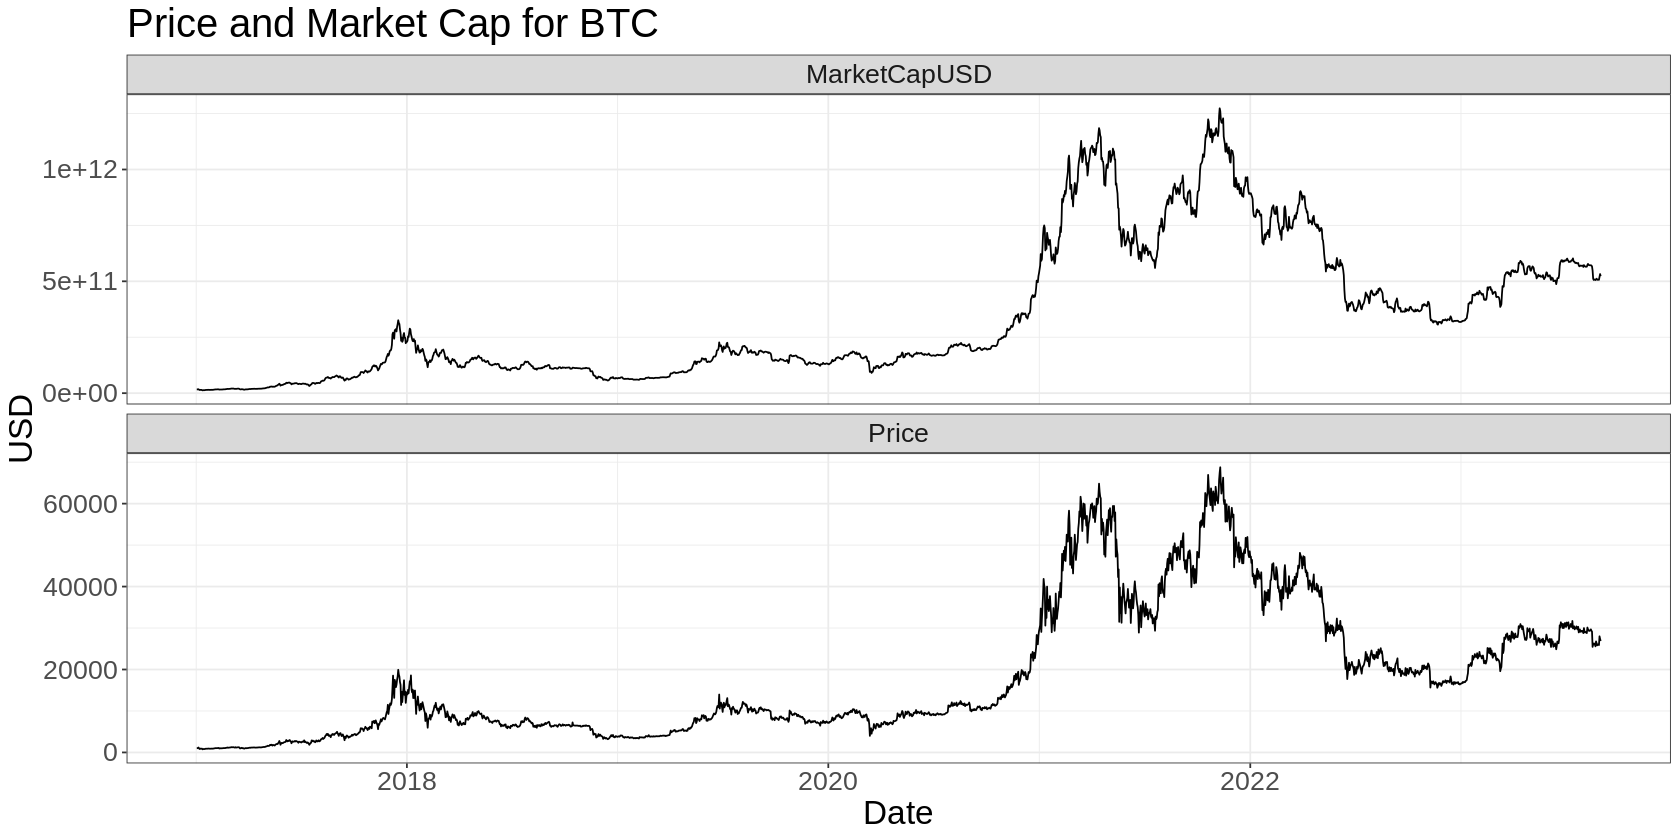

In [ ]:
# Set chart options
options(repr.plot.width = 14, repr.plot.height=7)
theme_set(theme_bw())
theme_update(text = element_text(size = 20))

coincodex %>%
  filter(Ticker == "BTC") %>%
  select(-Volume) %>%
  pivot_longer(c(-Ticker, -Date), names_to = "Quantity", values_to = "Value") %>%
  ggplot(aes(x = Date, y = Value)) +
    geom_line() +
    facet_wrap(~Quantity, ncol = 1, scales = "free_y") +
    labs(
      title = "Price and Market Cap for BTC",
      x = "Date",
      y = "USD"
    )

## 1h Spot OHLCV from Binance

In [ ]:
spot <- rwRtools::crypto_get_binance_spot_1h()
head(spot)

ℹ Downloading binance_spot_1h.feather

✔ Saved binance_spot_1h.feather to binance/binance_spot_1h.feather  ( 754.4 Mb )





File successfully transferred


Ticker,Datetime,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
BTCUSDT,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,202366.14,171,35.160503,150952.48
ETHUSDT,2017-08-17 04:00:00,301.13,302.57,298.00,301.61,125.668770,37684.80,129,80.563770,24193.44
BTCUSDT,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,100304.82,102,21.448071,92608.28
ETHUSDT,2017-08-17 05:00:00,301.61,303.28,300.00,303.10,377.672460,114043.28,202,328.104280,99079.80
BTCUSDT,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,31282.31,36,4.802861,20795.32
ETHUSDT,2017-08-17 06:00:00,302.40,304.44,301.90,302.68,303.866720,92034.44,182,259.286680,78525.95


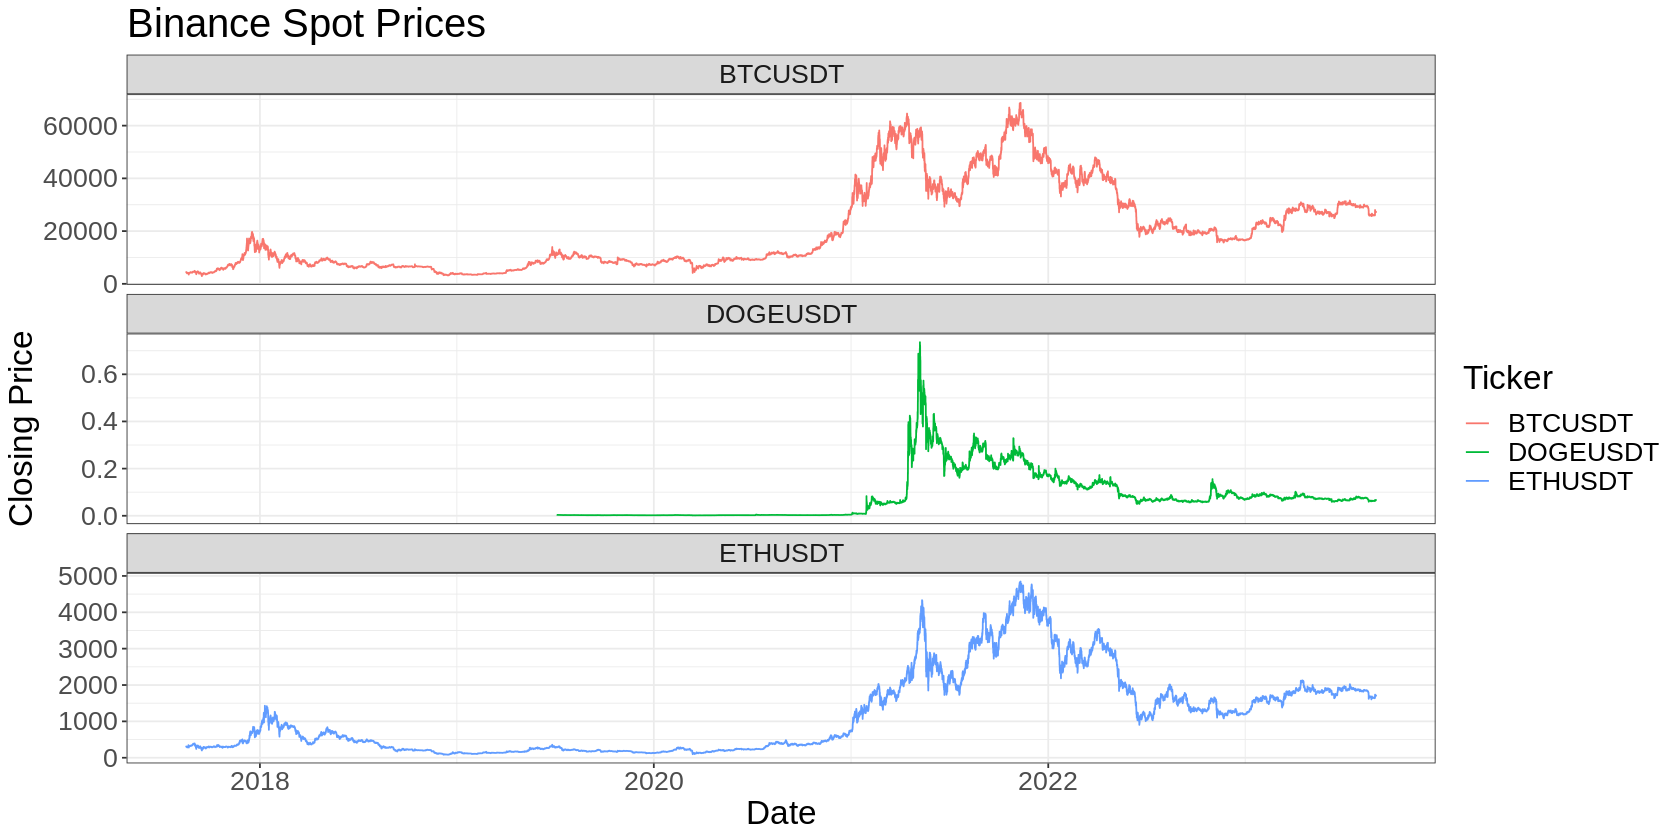

In [ ]:
spot %>%
  filter(Ticker %in% c("BTCUSDT", "ETHUSDT", "DOGEUSDT")) %>%
  ggplot(aes(x = Datetime, y = Close, colour = Ticker)) +
    geom_line() +
    labs(
      title = "Binance Spot Prices",
      x = "Date",
      y = "Closing Price"
    ) +
    facet_wrap(~Ticker, scales = "free_y", ncol = 1)

## 1h Perps from Binance

In [8]:
perps <- rwRtools::crypto_get_binance_perps_1h()
head(perps)

ℹ Downloading binance_perps_1h.feather

✔ Saved binance_perps_1h.feather to binance/binance_perps_1h.feather  ( 352.4 M…





File successfully transferred


Ticker,Datetime,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
BTCUSDT,2019-09-08 17:00:00,10000.00,10000.00,10000.00,10000.00,0.002,20,2,0.001,10.0000
BTCUSDT,2019-09-08 18:00:00,10000.00,10000.00,10000.00,10000.00,0.000,0,0,0.000,0.0000
BTCUSDT,2019-09-08 19:00:00,10344.77,10357.53,10337.43,10340.12,471.659,4879792,562,0.000,0.0000
BTCUSDT,2019-09-08 20:00:00,10340.12,10368.64,10334.54,10351.42,583.271,6037733,731,0.034,351.9712
BTCUSDT,2019-09-08 21:00:00,10351.42,10391.90,10324.77,10391.90,689.759,7136799,827,0.004,41.3850
BTCUSDT,2019-09-08 22:00:00,10392.59,10412.65,10375.58,10375.58,675.394,7020273,821,0.000,0.0000


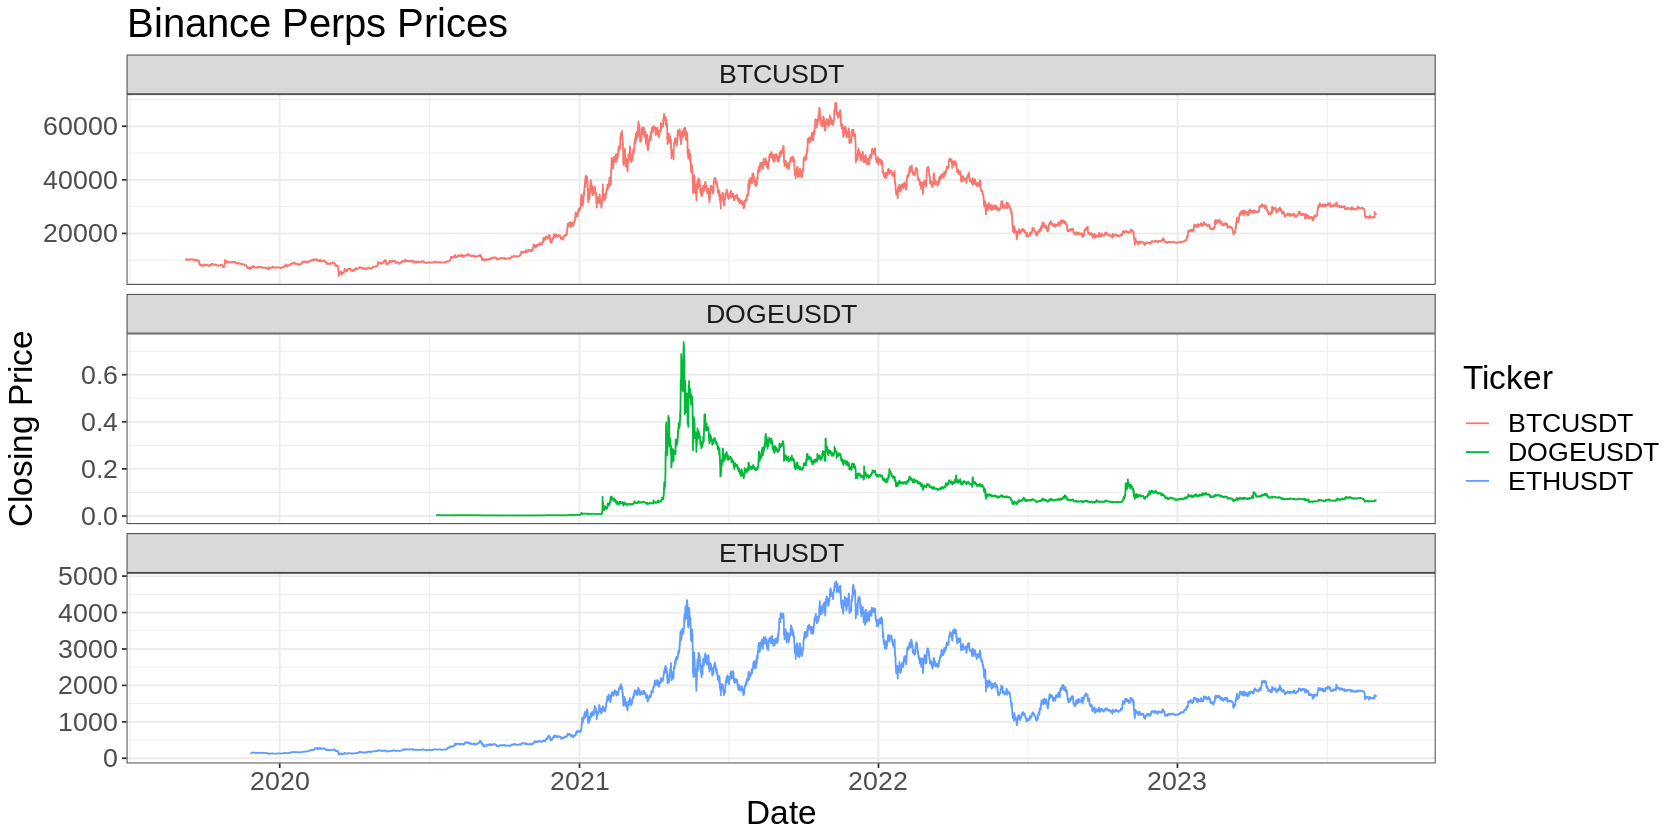

In [ ]:
perps %>%
  filter(Ticker %in% c("BTCUSDT", "ETHUSDT", "DOGEUSDT")) %>%
  ggplot(aes(x = Datetime, y = Close, colour = Ticker)) +
    geom_line() +
    labs(
      title = "Binance Perps Prices",
      x = "Date",
      y = "Closing Price"
    ) +
    facet_wrap(~Ticker, scales = "free_y", ncol = 1)

## Binance Perps Funding

In [2]:
perps_funding <- rwRtools::crypto_get_binance_perps_funding()
head(perps_funding)

ℹ Downloading binance_perps_funding.feather

✔ Saved binance_perps_funding.feather to binance/binance_perps_funding.feather …





File successfully transferred


Ticker,funding_time,funding_rate
<chr>,<dttm>,<dbl>
BTCUSDT,2019-09-10 08:00:00,1e-04
BTCUSDT,2019-09-10 16:00:00,1e-04
BTCUSDT,2019-09-11 00:00:00,1e-04
BTCUSDT,2019-09-11 08:00:00,1e-04
BTCUSDT,2019-09-11 16:00:00,1e-04
BTCUSDT,2019-09-12 00:00:00,1e-04


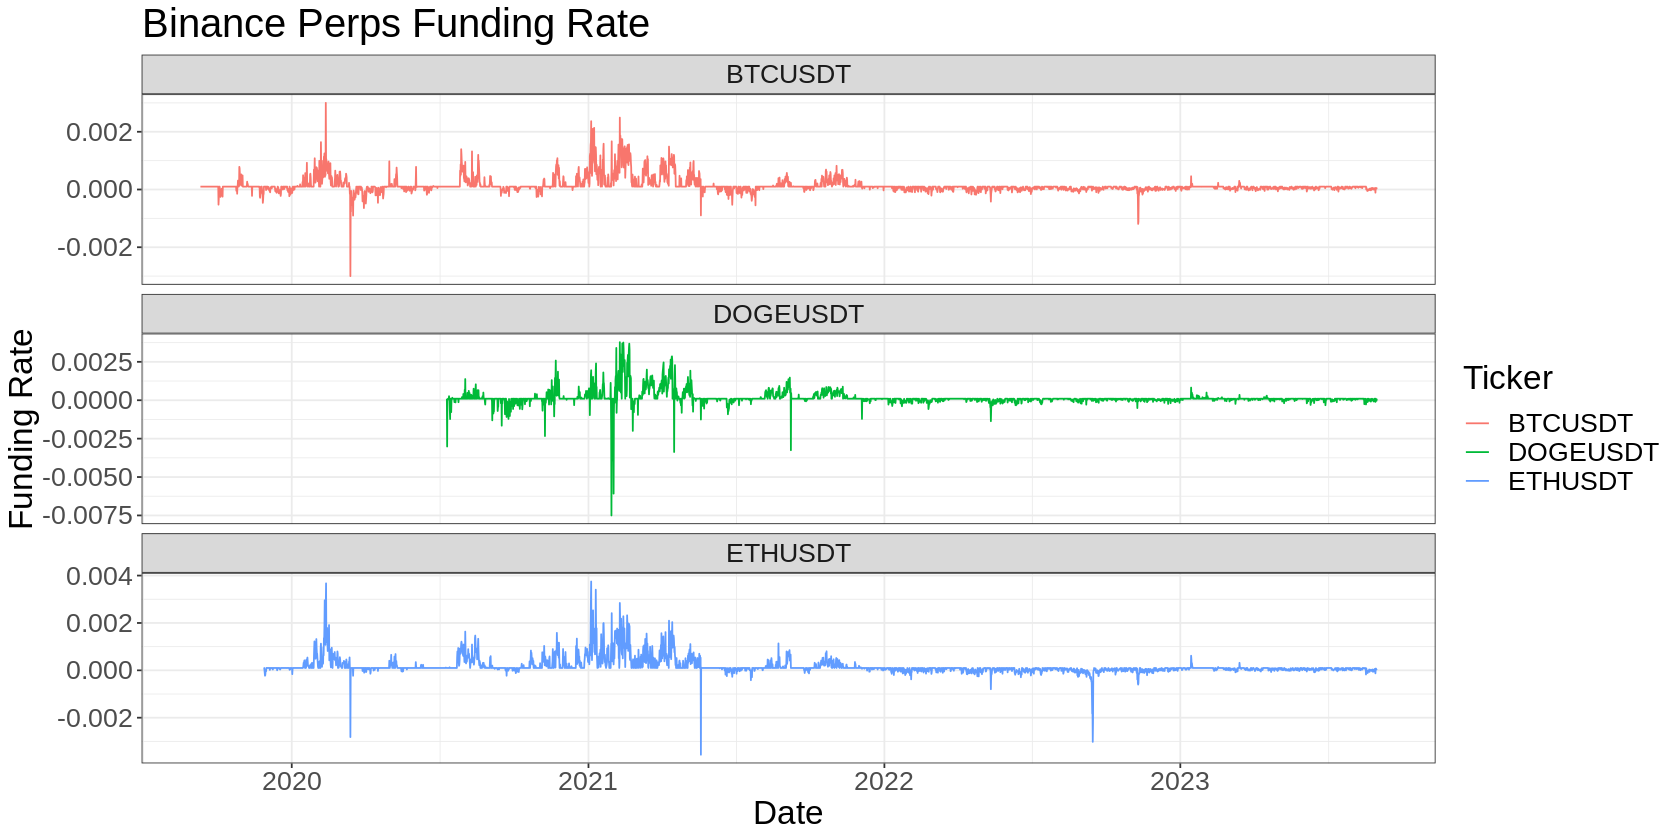

In [ ]:
perps_funding %>%
  filter(Ticker %in% c("BTCUSDT", "ETHUSDT", "DOGEUSDT")) %>%
  ggplot(aes(x = funding_time, y = funding_rate, colour = Ticker)) +
    geom_line() +
    labs(
      title = "Binance Perps Funding Rate",
      x = "Date",
      y = "Funding Rate"
    ) +
    facet_wrap(~Ticker, scales = "free_y", ncol = 1)

The `funding_time` does not always fall exactly on the hour. So you'll want to truncate it if you need to join it on a datetime field.

In [10]:
perps_funding %>%
  mutate(Datetime = lubridate::floor_date(lubridate::as_datetime(funding_time), 'hour')) %>%
  select(-funding_time) %>%
  left_join(perps, by = c("Ticker", "Datetime")) %>%
  head()

Ticker,funding_rate,Datetime,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
BTCUSDT,1e-04,2019-09-10 08:00:00,10271.93,10286.15,10247.20,10256.08,374.454,3843723,355,332.883,3417047
BTCUSDT,1e-04,2019-09-10 16:00:00,10172.13,10237.41,10172.13,10225.40,306.303,3126934,353,192.995,1970610
BTCUSDT,1e-04,2019-09-11 00:00:00,10094.27,10293.11,10090.62,10142.52,390.557,3974040,427,269.700,2744288
BTCUSDT,1e-04,2019-09-11 08:00:00,10068.41,10074.32,10004.26,10005.18,268.074,2691880,333,219.639,2205226
BTCUSDT,1e-04,2019-09-11 16:00:00,9992.18,10110.21,9934.11,10044.87,643.320,6451662,947,471.630,4733026
BTCUSDT,1e-04,2019-09-12 00:00:00,10163.06,10205.46,10141.11,10155.22,685.695,6968518,784,555.634,5647154


## Daily perp price and funding dataframe

In [11]:
perps_funding %>%
  mutate(Datetime = lubridate::floor_date(lubridate::as_datetime(funding_time), 'hour')) %>%
  select(-funding_time) %>%
  left_join(perps, by = c("Ticker", "Datetime")) %>%
  mutate(Date = lubridate::as_date(Datetime)) %>%
  group_by(Ticker, Date) %>%
  arrange(Date) %>%
  summarise(
    open = first(Open),
    high = max(High),
    low = min(Low),
    close = last(Close),
    quote_asset_volume = sum(`Quote asset volume`),
    num_trades = sum(`Number of trades`),
    taker_buy_volume = sum(`Taker buy base asset volume`),
    taker_buy_quote_volumne = sum(`Taker buy quote asset volume`),
    funding_rate = sum(coalesce(funding_rate, 0))
  ) %>%
  head()

`summarise()` has grouped output by 'Ticker'. You can override using the
`.groups` argument.


Ticker,Date,open,high,low,close,quote_asset_volume,num_trades,taker_buy_volume,taker_buy_quote_volumne,funding_rate
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1000FLOKIUSDT,2023-05-06,0.04231,0.04446,0.04231,0.04332,6632757,27619,77489569,3364478,0.00010000
1000FLOKIUSDT,2023-05-07,0.03999,0.04049,0.03797,0.03955,10091138,42818,122681272,4812448,-0.00118601
1000FLOKIUSDT,2023-05-08,0.03921,0.03991,0.03522,0.03528,7770097,37577,99700812,3694292,-0.00103427
1000FLOKIUSDT,2023-05-09,0.03436,0.03662,0.03400,0.03559,6903431,33474,109084639,3835394,0.00024978
1000FLOKIUSDT,2023-05-10,0.03583,0.03749,0.03440,0.03678,3337704,17420,46623673,1670782,0.00006755
1000FLOKIUSDT,2023-05-11,0.03770,0.03773,0.03424,0.03437,4199250,17853,57551299,2055660,0.00019759
